In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### 예제 
1. test_csv 폴더에 있는 '오프라인.csv' 로드 
2. 컬럼의 이름을 ['기준년월', '업종', '성별', '연령대', '이용건수', '이용금액'] 변경
3. 기준년월 컬럼의 데이터를 시계열로 변경
4. 성별컬럼이 1,2,9로 이루어져있다 
    - 1은 '남자'로 변경
    - 2는 '여자'로 변경
    - 9는 '무응답'으로 변경
    - 그 외의 숫자는 '-'
5. 남, 여 성별을 기준으로 연도별 건당 이용금액의 평균이 몇인지 출력 & 시각화
    - 건당이용금액이라는 파생변수를 생성
    - 연도라는 파생변수 생성
    - 성별, 연도로 그룹화 -> 건당이용금액의 평균을 그룹 연산

In [ ]:
df  = pd.read_csv('../test_csv/오프라인.csv', encoding='cp949')
df.head()

In [ ]:
# 컬럼의 이름을 변경하시오
# 전체 컬럼의 이름을 변경하는 경우
df.columns = ['기준년월', '업종', '성별', '연령대', '이용건수', '이용금액']
df.head(1)

In [ ]:
df2 = df.rename(
    {'기준년월' : '년월', 
     '업종' : '장소'}, 
    axis=1
)

In [ ]:
df.head(2)

In [ ]:
# 기준년월의 데이터를 시계열 데이터로 변경
# to_datetime(변경할 데이터, format="변경할 데이터의 형태")
df['기준년월'] = pd.to_datetime(df['기준년월'], format='%Y%m')

In [ ]:
df.info()

In [ ]:
df['연령대'].value_counts()

In [ ]:
# 성별 데이터의 개수 출력
df['성별'].value_counts()

In [ ]:
# 결측치 확인
df.isna().sum()

In [ ]:
# 1은 남자, 2는 여자 9는 무응답 그 외의 숫자가 있다면 '-'

# case1 (apply() + 일반함수)

def change(x):
    # x가 1인 경우
    # if x == 1:
    #     result = '남자'
    # elif x == 2:
    #     result = '여자'
    # elif x == 9:
    #     result = '무응답'
    # else:
    #     result = '-'
    # return result
    result = '-'
    if x == 1:
        result = '남자'
    if x == 2:
        result = '여자'
    if x == 9:
        result = '무응답'
    return result

df['성별'].apply(change)

In [ ]:
# case2 (apply() + lambda함수)
# if문을 한줄로 표현 (참일때의값 if 조건식 else 거짓일때의값)
df['성별'].apply(
    lambda x : '여자' if x == 2 else (
        '남자' if x == 1 else (
            '무응답' if x == 9 else '-'
        )
    )
)

In [ ]:
df.index

In [ ]:
# case3 (for문)

# 비어있는 리스트 생성
gender_data = []

for i in df.index:
    flag = df.loc[i, '성별']
    # 인덱스의 위치에 성별의 데이터가 1이라면
    if flag == 1:
        result = '남자'
    elif flag == 2:
        result = '여자'
    elif flag == 9 :
        result = '무응답'
    else : 
        result = '-'
    gender_data.append(result)

pd.Series(gender_data)

In [ ]:
# case4 (replace())
# 스리즈에 데이터에서 replace함수가 존재

# 문자열에서 replace 사용하는 경우
a = 'Hello World'
a.replace('Hello', 'Hi')

In [ ]:
df['업종'].value_counts()

In [ ]:
df2.loc[0, '성별'] = 5
df2

In [ ]:
df2['성별'].replace({
    1 : '남자', 
    2 : '여자', 
    9 : '무응답'
}).apply(lambda x : x if x in ['남자', '여자', '무응답'] else '-')

In [ ]:
# case5 (loc[]를 이용하여 데이터를 변경)

# loc[]를 이용해서 성별이 1인 데이터만 출력하려면?

# 조건
df['성별'] == 1
# loc[인덱스의 조건, 컬럼의 조건]를 이용하여 필터 성별 데이터만 출력
df.loc[df['성별'] == 1, '성별'] = '남자'
df.loc[df['성별'] == 2, '성별'] = '여자'
df.loc[df['성별'] == 9, '성별'] = '무응답'

In [ ]:
df['성별'].value_counts()

In [ ]:
# 건당이용금액 -> 이용금액 / 이용건수
df['건당이용금액'] = \
     (df['이용금액'] / df['이용건수']).round(0).astype('int')

In [ ]:
# 연도 -> 기준년월에서 년만 추출
df['연도'] = df['기준년월'].dt.strftime('%Y')

In [ ]:
df.head()

In [ ]:
# 성별과 연도를 기준으로 그룹화하여 건당이용금액의 평균을 출력
group_data = \
df[['성별', '연도' ,'건당이용금액']].groupby(['성별', '연도']).mean()

In [ ]:
test = group_data.sum()

In [ ]:
# 스리즈를 데이터프레임으로 변경
test = test.to_frame()


In [ ]:
# 행과 열의 위치를 변경
# test.transpose()
test = test.T

In [ ]:
pd.concat([group_data, test], axis=0)

In [ ]:
import platform

In [ ]:
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

In [ ]:
group_data.plot.bar()

In [ ]:
pivot_data = pd.pivot_table(
    df, 
    index = '연도', 
    columns = '성별', 
    aggfunc = 'sum', 
    values = '이용건수'
)

In [ ]:
pivot_data.plot.bar()

### 온라인 카드 매출과 오프라인 카드 매출을 비교
1. 오프라인 데이터를 기준년월별로 그룹화하여 이용금액의 합계를 출력
2. 온라인 데이터를 기준년월별로 그룹화하여 이용금액의 합계를 출력
    - test_csv에 있는 온라인.csv 로드 
    - 컬럼의 이름 변경 -> ['기준년월', '성별', '연령대', '이용건수', '이용금액']
    - 기준년월을 시계열 데이터로 변경
    - 기준년월로 그룹화를 하여 이용금액의 합계를 그룹 연산
3. 두개의 이용금액 데이터를 plot그래프로 하나의 그래프를 출력

In [ ]:
# 오프라인 데이터를 기준년월 별 이용금액의 합계를 출력
df[['기준년월', '이용금액']].groupby('기준년월').sum()

In [ ]:
offline = pd.pivot_table(
    df, 
    index='기준년월', 
    aggfunc='sum', 
    values='이용건수'
)

In [ ]:
# 온라인데이터로드 
df2 = pd.read_csv("../test_csv/온라인.csv", encoding='cp949')
df2.head()

In [ ]:
# 컬럼의 이름을 변경 
df2.rename(
    {
        'crym' : '기준년월', 
        'ma_fem_dc' : '성별', 
        'agegrp_dc' : '연령대', 
        'tco_btc_u_ct' : '이용건수', 
        'tco_btc_u_am' : '이용금액'
    }, 
    axis = 1, 
    inplace=True
)

In [ ]:
# 기준년월 데이터를 시계열로 변경
df2['기준년월'] = pd.to_datetime(df2['기준년월'], format='%Y%m')

In [ ]:
online = pd.pivot_table(
    df2, 
    index = '기준년월', 
    aggfunc='sum', 
    values='이용건수'
)

In [ ]:
offline

In [ ]:
# 그래프 시각화

# 데이터의 x축
x = offline.index
# y축 offline
y_off = offline['이용건수']
# y축 online 
y_on = online['이용건수']

plt.figure(figsize=(16, 8))
# grid 추가
plt.grid(True, axis='both')
# offline데이터를 그래프에 삽입
plt.plot(x, y_off, label='오프라인')
# online데이터를 그래프에 삽입
plt.plot(x, y_on, label='온라인')
# 범례 추가
plt.legend()

plt.show()

In [ ]:
# 두개의 데이터프레임을 결합(union결합)
group_data = pd.concat([offline, online], axis=1)

In [ ]:
group_data.plot()

### 데이터프레임 결합
1. offline data(df)와 online data(df2) 두개의 데이터프레임을 결합
2. df2에는 업종이라는 컬럼이 존재하지 않는다
    - df2에 업종 컬럼을 추가하고 데이터는 '온라인' 대입
3. 두 개의 데이터프레임을 단순한 행 결합(union결합)
4. 기준년월, 업종을 기준으로 그룹화하여 이용금액의 합계를 출력&시각화
5. 연령대별, 업종을 기준으로 그룹화하여 이용금액의 평균을 출력&시각화

In [ ]:
# df2에 업종이라는 새로운 컬럼을 추가 
df2['업종'] = '온라인'
df2.head(2)

In [ ]:
total_df = pd.concat([df, df2], axis=0, ignore_index=True)

In [ ]:
total_df

In [ ]:
# 기준년월, 업종을 기준으로 그룹화하여 이용금액의 합계를 출력
pivot_data = pd.pivot_table(
    total_df, 
    index = '기준년월', 
    columns = '업종',
    aggfunc= 'sum', 
    values = '이용금액'
)

In [ ]:
pivot_data.plot()

In [72]:
pivot_data.columns

Index(['백화점', '슈퍼마켓', '온라인', '편의점', '할인점'], dtype='object', name='업종')

In [ ]:
# 데이터를 시각화
plt.figure(figsize=(14, 8))
plt.grid(True, axis='y')
for col in pivot_data.columns:
    # col에 데이터는? -> columns의 name이 대입
    plt.plot(pivot_data[col], label=col)
plt.legend()
plt.show()

In [77]:
group_data = total_df[['기준년월', '업종', '이용금액']].groupby(['기준년월', '업종']).sum()

In [ ]:
group_data.unstack().plot()

In [86]:
pivot_data2 = pd.pivot_table(
    total_df, 
    index = '업종', 
    columns = '연령대', 
    aggfunc= 'sum', 
    values = '이용금액'
)

<Axes: xlabel='업종'>

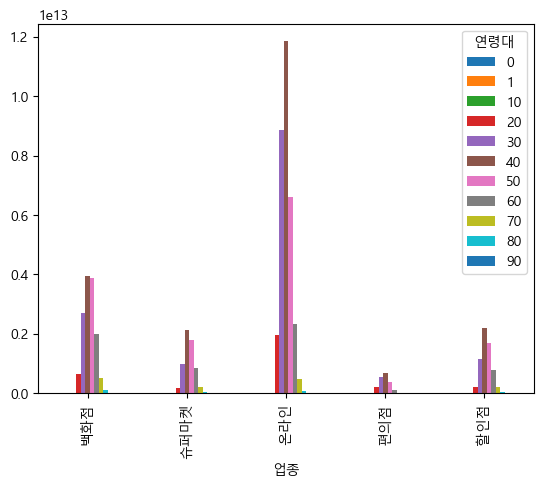

In [87]:
pivot_data2.plot.bar()

In [1]:
import sys

In [2]:
sys.path

['c:\\Users\\EZEN\\Documents\\GitHub\\ezen_pandas\\230820',
 'c:\\Users\\EZEN\\AppData\\Local\\Programs\\Python\\Python311\\python311.zip',
 'c:\\Users\\EZEN\\AppData\\Local\\Programs\\Python\\Python311\\DLLs',
 'c:\\Users\\EZEN\\AppData\\Local\\Programs\\Python\\Python311\\Lib',
 'c:\\Users\\EZEN\\AppData\\Local\\Programs\\Python\\Python311',
 '',
 'C:\\Users\\EZEN\\AppData\\Roaming\\Python\\Python311\\site-packages',
 'C:\\Users\\EZEN\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32',
 'C:\\Users\\EZEN\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32\\lib',
 'C:\\Users\\EZEN\\AppData\\Roaming\\Python\\Python311\\site-packages\\Pythonwin',
 'c:\\Users\\EZEN\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages',
 'C:\\Users\\EZEN\\Documents\\GitHub\\ezen_pandas\\reperence']